Multidimensional linear regression

Goal: to build a model for forecasting customer spending in an online store

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# LOading the data
raw_data = pd.read_csv('EcommerceCustomers.csv')
raw_data

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


Regression

Selecting the target (dependent) variable "Yearly Amount Spent"

Independent variables - all others except "Yearly Amount Spent"

The columns 'Email', 'Address', 'Avatar' do not affect the data and their changes in any way, so it makes no sense to overload the system with their recalculation (there is no need to spend resources on processing them, because it does not meet the desired goal)

In [3]:
target = raw_data['Yearly Amount Spent']

data = raw_data.drop(['Email', 'Address', 'Avatar', 'Yearly Amount Spent'], axis=1)

data.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


Divide the data into 2 parts 

Part 1 - 2/3 of the data - data for training

Part 2 - 1/3 of the data - data for training the test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=365)

Model

Creating a model
Inserting data into the model
We output the predicted values

In [5]:
reg = LinearRegression()


reg.fit(x_train, y_train)


y_pred = reg.predict(x_train)

Visualization of actual and predicted values

Comparing the actual value (target, y_train) and the predicted values (predictions, y_pred)

Visualizing them on a single graph

The closer the data cloud is to the 45 degree line, the better the forecast

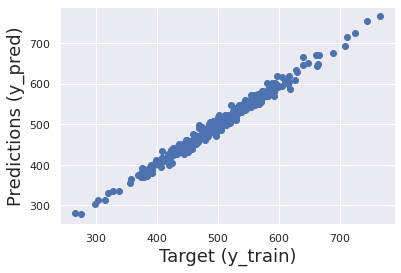

In [6]:
plt.scatter(y_train, y_pred)

plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Predictions (y_pred)', size=18)

plt.show()


The graph shows a cloud of points centered on the 45 degree line, which indicates a good forecast.

Let's visualize the regression residuals

Visualization of regression residuals (residual)

We look at the distribution (Residuals PDF) and outliers

Ideally, you should get a normal distribution with m=0

The result gives us food for thought - our model can be improved

Text(0.5, 1.0, 'Residuals PDF')

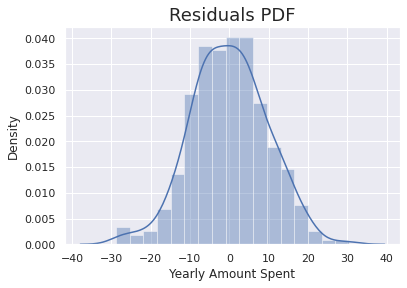

In [7]:
sns.distplot(y_train - y_pred)

# Include a title
plt.title('Residuals PDF', size=18)

Based on the graph, the distribution is close to normal

We find the efficiency criterion based on the training data

In [8]:
reg.score(x_train, y_train)

0.9843534796018386

The value of R^2 = 0.9843534796018386 is a good result

The value of the weights 
The value of w0 (intercept)

In [9]:
reg.intercept_

-1026.2649422996326

The value of w1, w2, w3, w4 (coefficients),since we have four independent variables,therefore we have four coefficients

In [10]:
reg.coef_

array([25.57595509, 38.78283499, -0.16789046, 61.90855366])

Correlate the coefficients with the variables for which they are responsible 
Creating a summary of weights and variables

In [11]:
reg_summery = pd.DataFrame(data.columns.values, columns=['Features'])
reg_summery['Weights'] = reg.coef_
reg_summery

,Features,Weights
0,Avg Session Length,25.575955
1,Time on App,38.782835
2,Time on Website,-0.167890
3,Length of Membership,61.908554


The coefficients Avo Session Length, Time on App, Length of Membership are positive, which means that these parameters have a positive effect on the variable Yearly Amount Spent

The "weights" are not very different, so the degree of their influence is also not very different

Since the Time on Website coefficient is negative and has a small value, it means that it has little effect on reducing the target variable

Testing

We are testing the model on data that was not taken into account during training

Values of test input variables: x_test, values of outputs y_test

Building a forecast based on test data

In [12]:
y_pred_test = reg.predict(x_test)

Visualization of actual and predicted values

Cpa Create a scatter plot with the test targets and the test predictions

Comparing test actual values (test targets, y_test) and test values of forecasts (test_predictions, y_pred_test)

To do this, we visualize them on the same graph 

The closer the data cloud is to the 45 degree line, the better the forecast

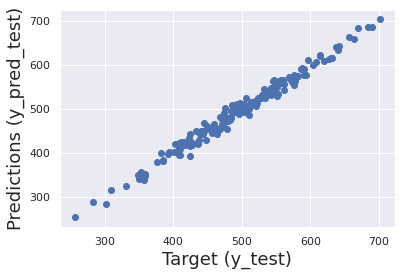

In [13]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Predictions (y_pred_test)', size=18)
plt.show()

Based on the graph, the data point cloud is centered on a 45-degree line, although it differs from the visualization of data for training

Find the value of the criterion R2

In [14]:
reg.score(x_test, y_test)

0.9839908135684234

The value of R^2 = 0.9839908135684234 is a good result , also does not differ from the previous one

Cross validation

Let's find the value of the R2 criterion in the cross validation approach

In [15]:
scores = cross_val_score(reg, data, target, cv=10)
cv_score = scores.mean()
cv_score

0.9825492707486994

The value of R^2 = 0.9825492707486994 is a good result , since the coefficient value has practically not changed

Let's build the value of forecasts

In [16]:
df_pf = pd.DataFrame(y_pred_test, columns=['Prediction'])
df_pf.head()

# Adding a column of actual values
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,455.980519,587.951054
1,496.634344,NaN
2,423.486744,NaN
3,567.151324,NaN
4,495.648832,NaN
...,...,...
160,475.750591,NaN
161,283.750831,NaN
162,465.274156,NaN
163,527.770415,NaN


NaN values are present because the old row indexes are preserved

Resetting indexes

Checking the result

In [17]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    461.920877
1    502.092528
2    407.542168
3    570.630098
4    496.933446
Name: Yearly Amount Spent, dtype: float64

Calculating the residuals: the difference between the actual target values and the predicted predictions

We look at how far we are from the result as a percentage

Calculate the absolute difference in percentages

Statistical summary

In [18]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)

df_pf.describe()

,Prediction,Target,Residual,Difference%
count,165.000000,60.000000,60.000000,60.000000
mean,496.736584,514.969612,20.931900,17.327548
std,84.093064,79.485881,107.501644,12.484737
min,254.159047,347.776927,-210.948614,0.718921
25%,443.769399,465.062065,-53.517382,8.776947
50%,500.479194,509.033668,17.056547,14.781827
75%,554.407888,574.139695,106.189130,25.779298
max,703.230836,700.917092,224.691277,60.656300


On average, the error was 1,745%

Minimum error - percentage deviation from the actual value = 0.0078%

Maximum error - percentage deviation from the actual value = 7,209%

Conclusion: The constructed regression is well suited for predicting the parameter of annual customer spending in an online store